***
---
# <font color='darkslategray'><span style='font-family:Georgia'> Frage 3: Wie wurden die Folgen der Miniserie “Das Damengambit” im Durchschnitt bewertet? </span></font>
---
***

## <font color='darkslategray'><span style='font-family:Georgia'>Import der Bibliotheken</span></font>

In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

## <font color='darkslategray'><span style='font-family:Georgia'>Import und Aufbereitung der Datensätze</span></font>

In [2]:
# Speichern der benötigten URLs
url_data_ratings = "https://datasets.imdbws.com/title.ratings.tsv.gz" 
url_data_episodes = "https://datasets.imdbws.com/title.episode.tsv.gz"
url_data_information = "https://datasets.imdbws.com/title.akas.tsv.gz"

In [3]:
# Zusammenfassen der benötigten Daten (Name der Datei, URL)
title_episode_file = "title_episode.tsv.gz", url_data_episodes
title_ratings_file = "title_ratings.tsv.gz", url_data_ratings
title_information_file = "title.akas.tsv.gz", url_data_information

In [4]:
# Download der Daten auf lokalem Gerät
urllib.request.urlretrieve(title_ratings_file[1], title_ratings_file[0])
urllib.request.urlretrieve(title_episode_file[1], title_episode_file[0])
urllib.request.urlretrieve(title_information_file[1], title_information_file[0]);

In [5]:
# Auslesen der Informationen zu Bewertungen und Speicherung in einer Variable
dataset_ratings = pd.read_csv(title_ratings_file[0], compression='gzip', sep = "\t") 

In [6]:
# Auslesen der Informationen zu Episoden und Speicherung in einer Variable
dataset_episodes = pd.read_csv(title_episode_file[0], compression='gzip', sep = "\t") 

In [7]:
# Auslesen der Informationen zu Serien und Speicherung in einer Variable
dataset_information = pd.read_csv(title_information_file[0], compression='gzip', sep = "\t") 
# Dtype Warnung aufgrund unterschiedlicher Datentypen im Datensatz

C:\Users\DenniSandra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## <font color='darkslategray'><span style='font-family:Georgia'>Suche nach der Serie im Datensatz</span></font>

In [8]:
# Wenn der Titel identisch mit "Das Damengambit" ist, werden die Daten aus dem Datensatz in der Variable gespeichert
# Es wird in information geschaut, ob im Label "title" von information "Das Damengambit" vorkommt
# - Trifft dies zu, werden alle Informationen der Zeile in der Variable gespeichert
titlename = dataset_information[dataset_information["title"] == "Das Damengambit"]

# Extraktion der Titelidentifikationsnummer
# (wird benötigt um relevante Informationen der Serie in den anderen Datensätzen zu identifizieren)
# - dabei ist zu beachten, dass die Titel ID alle Ländererscheinungen umfasst

title_id = titlename.titleId.iloc[0] # iloc[0] entfernt die Labels von den Daten
title_id

'tt10048342'

In [9]:
# Die Titel-ID aus dem Datensatz mit den allgemeinen Titelinformationen ist identisch mit 
# der Serien-ID des Datensatzes mit den Serieninformationen

# Rausfiltern der benötigten Episodenidentifikationsnummer anhand der Titelidentifikationsnummer
# Wenn die Titelidentifikationsnummern identisch sind, werden die Daten aus dem Datensatz in der Variable gespeichert
episode_Damengambit = dataset_episodes[dataset_episodes["parentTconst"] == title_id]
episode_Damengambit

,tconst,parentTconst,seasonNumber,episodeNumber
468343,tt10062310,tt10048342,1,1
468344,tt10062312,tt10048342,1,2
468345,tt10062314,tt10048342,1,3
468347,tt10062318,tt10048342,1,4
468349,tt10062320,tt10048342,1,5
468350,tt10062322,tt10048342,1,6
1795120,tt12984026,tt10048342,1,7


## <font color='darkslategray'><span style='font-family:Georgia'>Definition und Visualisierung der Serienbewertung</span></font>

In [10]:
# Wenn die Titelidentifikationsnummern identisch sind, werden die Daten aus dem Datensatz in der Variable gespeichert
rating_Damengambit = dataset_ratings[dataset_ratings["tconst"] == title_id]
# So wurde die gesamte Serie (nicht die einzelnen Episoden) bewertet:
rating_Damengambit

,tconst,averageRating,numVotes
454309,tt10048342,8.6,412761


In [11]:
# Rausfiltern der benötigten Episodeninformationen
# Automatisiert innerhalb einer Schleife

# Erstellen einer leeren Liste
rating_episode_DG = []
i = 0 # Zählervariable für die Schleife
# n anhand der Länge von episode_Damengambit (Episodenanzahl) einstellen:
n = len(episode_Damengambit) # Endwert für die Schleife ; len steht für "lenght", also in diesem Fall für die Serienlänge
while i < n: # Bedingung für die Schleife: Sie zählt weiter solange Episoden noch vorhanden sind
    # wenn die Episodenidentifikationsnummer identisch ist, werden die Daten aus dem Bewertungsdatensatz in der Variable gespeichert
    buffer_ratings = dataset_ratings[dataset_ratings["tconst"] == episode_Damengambit.tconst.iloc[i]]
    # die Liste wird nun mit den Daten aus buffer_ratings erweitert
    rating_episode_DG.append(buffer_ratings)
    print("Folge: " , i+1, "\n",  rating_episode_DG[i], "\n")
    # i um 1 erhöhen
    i = i + 1

Folge:  1 
             tconst  averageRating  numVotes
454853  tt10062310            8.4     10746 

Folge:  2 
             tconst  averageRating  numVotes
454854  tt10062312            8.7     10010 

Folge:  3 
             tconst  averageRating  numVotes
454855  tt10062314            8.4      9073 

Folge:  4 
             tconst  averageRating  numVotes
454856  tt10062318            8.4      8808 

Folge:  5 
             tconst  averageRating  numVotes
454857  tt10062320            8.2      8535 

Folge:  6 
             tconst  averageRating  numVotes
454858  tt10062322            8.4      8626 

Folge:  7 
             tconst  averageRating  numVotes
599349  tt12984026            9.2     11745 



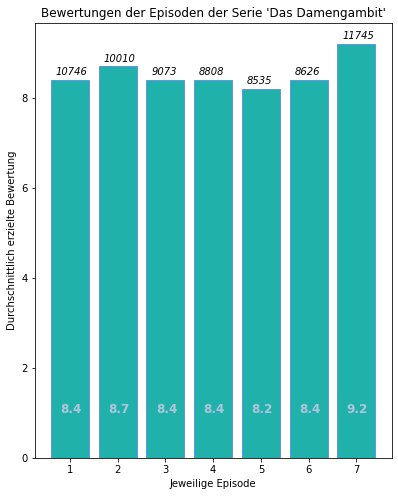

In [12]:
# Verteilung der Balken auf der x-Achse
x_axis = [1, 2, 3, 4, 5, 6, 7]

# Höhe der Balken
# iloc[0,1] entfernt die Labels und nutzt die Daten in der zweiten Spalte (erste Datenspalte)
# rating_episode_DG[0] Daten an der ersten Stelle der Liste
rating = [rating_episode_DG[0].iloc[0,1], rating_episode_DG[1].iloc[0,1], rating_episode_DG[2].iloc[0,1], rating_episode_DG[3].iloc[0,1], rating_episode_DG[4].iloc[0,1], rating_episode_DG[5].iloc[0,1], rating_episode_DG[6].iloc[0,1]]

# Bezeichnung der Balken
voting_numbers = [rating_episode_DG[0].iloc[0,2], rating_episode_DG[1].iloc[0,2], rating_episode_DG[2].iloc[0,2], rating_episode_DG[3].iloc[0,2], rating_episode_DG[4].iloc[0,2], rating_episode_DG[5].iloc[0,2], rating_episode_DG[6].iloc[0,2]] 

# Plot vergrößern (Standardwerte: Breite - 6.4 Höhe - 4.8) um die Stimmen über den Balken im Plot richtig zu präsentieren
plt.rcParams["figure.figsize"] = (6.4,8)

# Balkendiagramm plotten (x-Werte, y-Werte, Breite der Balken, Farbe der Balken, Rahmenfarbe der Balken)
plt.bar(x_axis, rating, width = 0.8, color = "lightseagreen", edgecolor = "cornflowerblue")

# Schleifen zur Erzeugung der Beschriftung im Diagramm
for index, value in enumerate(rating):
    # index+0.7, value+0.1 sind dazu da, um die angezeigten Werte auszurichten ; str(label[index] dient zur Beschriftung
    plt.text(index+0.7, value+0.1, str(voting_numbers[index]), fontstyle = "italic") 
for index, value in enumerate(rating):
    # +0.8 und 1 sind dazu da die angezeigten Werte zu zentrieren ; str(rating[index] dient zur Beschriftung ; color ändert die Textfarbe
    plt.text(index+0.8, 1, str(rating[index]), color = "lightsteelblue", fontsize = "large", fontweight = "bold") 
    
# Beschriftung Plot
plt.xlabel("Jeweilige Episode")
plt.ylabel("Durchschnittlich erzielte Bewertung")
plt.title("Bewertungen der Episoden der Serie 'Das Damengambit'")

# Plot anzeigen
plt.show()